In [1]:
import numbers as np
from prondict import *
from lab2_proto import *
from lab2_tools import *
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)
import matplotlib.pyplot as plt

In [2]:
# Loding data
phoneHMMs_one = phoneHMMs_one = np.load("lab2_models_onespkr.npz", allow_pickle=True)[
    "phoneHMMs"
].item()

isolated = {}
for digit in prondict.keys():
    isolated[digit] = ['sil'] + prondict[digit] + ['sil']

wordHMMs_one = {}
for digit in prondict.keys():
    wordHMMs_one[digit] = concatHMMs(phoneHMMs_one, isolated[digit])

print(wordHMMs_one['o'].keys()) 

dict_keys(['startprob', 'transmat', 'means', 'covars'])


Does Gaussian emission probs work:
True
Does Forward algorithm work:
True
True
Does Viterbi algorithm work:
True
Does Backward algorithm work:
True
Does State posteriors work:
True


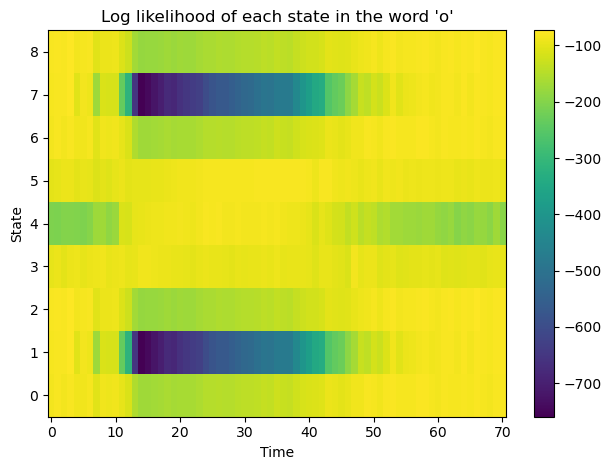

In [3]:
# Compare with example data
example = np.load('lab2_example.npz', allow_pickle=True)['example'].item()


compare = {}



# Gaussian emission probabilities
lmfcc = example["lmfcc"]
example_obsloglik = example["obsloglik"]
obsloglik = log_multivariate_normal_density_diag(


    X=lmfcc, means=wordHMMs_one["o"]["means"], covars=wordHMMs_one["o"]["covars"]
)
compare["obsloglik"] = obsloglik
print("Does Gaussian emission probs work:")
print(np.array_equal(np.round(example_obsloglik, 4), np.round(compare["obsloglik"], 4)))



# Forward algorithm
log_alpha = forward(obsloglik, np.log(wordHMMs_one["o"]["startprob"]), np.log(wordHMMs_one["o"]["transmat"]))
compare["log_alpha"] = log_alpha
example_logalpha = example["logalpha"]
print("Does Forward algorithm work:")
print(np.array_equal(np.round(example_logalpha, 4), np.round(compare["log_alpha"], 4)))



# Viterbi algorithm
viterbi_loglik, path = viterbi(
    obsloglik,
    np.log(wordHMMs_one["o"]["startprob"]),
    np.log(wordHMMs_one["o"]["transmat"][:-1, :-1]),
)
print(np.array_equal(np.round(viterbi_loglik, 1), np.round(example["vloglik"], 1)))


print("Does Viterbi algorithm work:")
viterbi_loglik, path = viterbi(
    obsloglik,
    np.log(wordHMMs_one["o"]["startprob"]),
    np.log(wordHMMs_one["o"]["transmat"][:-1, :-1]),
)
print(np.array_equal(np.round(viterbi_loglik, 1), np.round(example["vloglik"], 1)))

# Backward algorithm
log_beta = backward(obsloglik, np.log(wordHMMs_one["o"]["startprob"]), np.log(wordHMMs_one["o"]["transmat"]))
compare["log_beta"] = log_beta
example_logbeta = example["logbeta"]
print("Does Backward algorithm work:")
print(np.array_equal(np.round(example_logbeta, 4), np.round(compare["log_beta"], 4)))

# State posteriors
log_gamma = statePosteriors(log_alpha, log_beta)
compare["log_gamma"] = log_gamma
example_loggamma = example["loggamma"]
print("Does State posteriors work:")
print(np.array_equal(np.round(example_loggamma, 4), np.round(compare["log_gamma"], 4)))

# Plot the log likelyhood for Gaussians from HMMs models corresponding to the word 'o'
plt.figure()
plt.imshow(obsloglik.T, aspect="auto", origin="lower", interpolation="none")
plt.title("Log likelihood of each state in the word 'o'")
plt.xlabel("Time")
plt.ylabel("State")
plt.colorbar()
plt.tight_layout()
plt.show()

Utterance:  0  Digit:  o
Utterance:  1  Digit:  o
Utterance:  2  Digit:  o
Utterance:  3  Digit:  o
Utterance:  4  Digit:  o
Utterance:  5  Digit:  o
Utterance:  6  Digit:  o
Utterance:  7  Digit:  o
Utterance:  8  Digit:  o
Utterance:  9  Digit:  o
Utterance:  10  Digit:  o
Utterance:  11  Digit:  o
Utterance:  12  Digit:  o
Utterance:  13  Digit:  o
Utterance:  14  Digit:  o
Utterance:  15  Digit:  o
Utterance:  16  Digit:  o
Utterance:  17  Digit:  o
Utterance:  18  Digit:  o
Utterance:  19  Digit:  o
Utterance:  20  Digit:  o
Utterance:  21  Digit:  o
Utterance:  22  Digit:  o
Utterance:  23  Digit:  o
Utterance:  24  Digit:  o
Utterance:  25  Digit:  o
Utterance:  26  Digit:  o
Utterance:  27  Digit:  o
Utterance:  28  Digit:  o
Utterance:  29  Digit:  o
Utterance:  30  Digit:  o
Utterance:  31  Digit:  o
Utterance:  32  Digit:  o
Utterance:  33  Digit:  o
Utterance:  34  Digit:  o
Utterance:  35  Digit:  o
Utterance:  36  Digit:  o
Utterance:  37  Digit:  o
Utterance:  38  Digit:

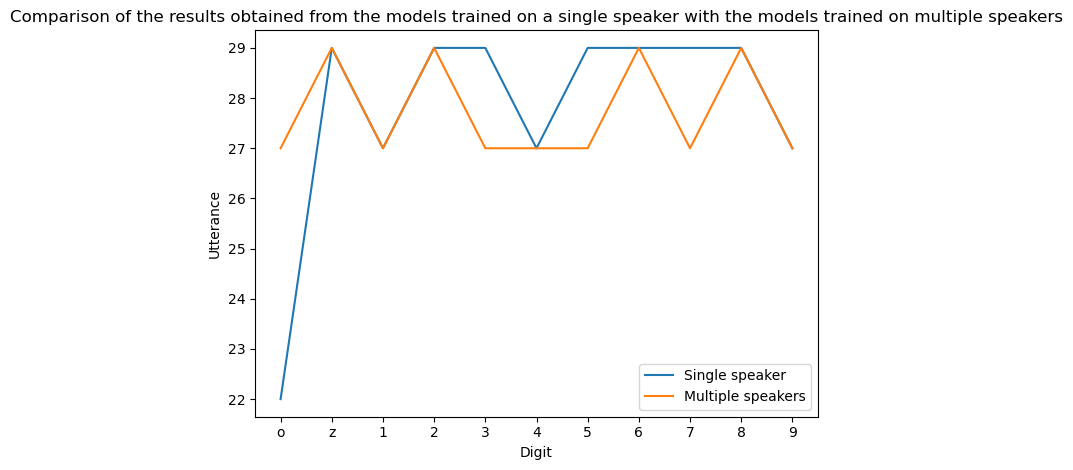

In [4]:
"""
Using your formula, score all the 44 utterances in the data array with each of the 11 HMM models in wordHMMs. Do you see any mistakes if you take the maximum likelihood model as the winner? Compare the results obtained from the models trained on a single speaker with the models trained on multiple speakers.
"""

example = np.load('lab2_data.npz', allow_pickle=True)['data']

# Experimentation with one example
phoneHMMs_one = phoneHMMs_one = np.load("lab2_models_onespkr.npz", allow_pickle=True)[
    "phoneHMMs"
].item()
isolated = {}
for digit in prondict.keys():
    isolated[digit] = ["sil"] + prondict[digit] + ["sil"]
wordHMMs_one = {}
for digit in prondict.keys():
    wordHMMs_one[digit] = concatHMMs(phoneHMMs_one, isolated[digit])


# Experimentation with all HMM models
phoneHMMs_all = np.load("lab2_models_all.npz", allow_pickle=True)["phoneHMMs"].item()
wordHMMs_all = {}
for digit in prondict.keys():
    wordHMMs_all[digit] = concatHMMs(phoneHMMs_all, isolated[digit])

#Score all the 44 utterances in the data array with each of the 11 HMM models in wordHMMs

# Single speaker
single_speaker = {}
for digit in prondict.keys():
    single_speaker[digit] = []
    for i in range(len(example)):
        print("Utterance: ", i, " Digit: ", digit)
        lmfcc = example[i]["lmfcc"]
        obsloglik = log_multivariate_normal_density_diag(
            X=lmfcc, means=wordHMMs_one[digit]["means"], covars=wordHMMs_one[digit]["covars"]
        )
        log_alpha = forward(obsloglik, np.log(wordHMMs_one[digit]["startprob"]), np.log(wordHMMs_one[digit]["transmat"]))
        # Grab the final log likelihood value at the final state
        single_speaker[digit].append(log_alpha[-1][-1])
print("\n")
print("Single speaker: ", single_speaker)

# Multiple speakers
multiple_speakers = {}
for digit in prondict.keys():
    multiple_speakers[digit] = []
    for i in range(len(example)):
        lmfcc = example[i]["lmfcc"]
        obsloglik = log_multivariate_normal_density_diag(
            X=lmfcc, means=wordHMMs_all[digit]["means"], covars=wordHMMs_all[digit]["covars"]
        )
        log_alpha = forward(obsloglik, np.log(wordHMMs_all[digit]["startprob"]), np.log(wordHMMs_all[digit]["transmat"]))
        multiple_speakers[digit].append(log_alpha[-1][-1])
print("\n")

print("Multiple speakers: ", multiple_speakers)

# Compare the results obtained from the models trained on a single speaker with the models trained on multiple speakers
single_speaker_max = {}
multiple_speakers_max = {}
for digit in prondict.keys():
    single_speaker_max[digit] = np.argmax(single_speaker[digit])
    multiple_speakers_max[digit] = np.argmax(multiple_speakers[digit])
print("\n")
print("Single speaker max: ", single_speaker_max)
print("Multiple speakers max: ", multiple_speakers_max)
print("\n")



# Plot the results obtained from the models trained on a single speaker with the models trained on multiple speakers
plt.figure()
plt.plot(list(single_speaker_max.keys()), list(single_speaker_max.values()), label="Single speaker")
plt.plot(list(multiple_speakers_max.keys()), list(multiple_speakers_max.values()), label="Multiple speakers")
plt.title("Comparison of the results obtained from the models trained on a single speaker with the models trained on multiple speakers")
plt.xlabel("Digit")
plt.ylabel("Utterance")
plt.legend()
plt.tight_layout()
plt.show()


Viterbi log likelihood for wordHMMs['o'] and example['lmfcc']:  -5974.211288357338
Example['vloglik']:  -5974.211288357338
Are they the same?  True


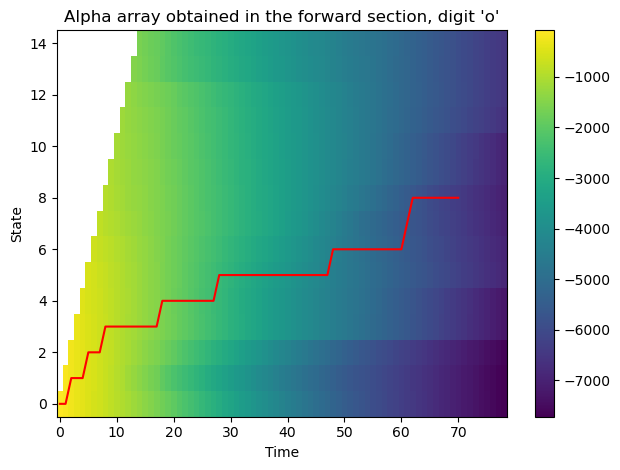



Viterbi scores:  {'o': [-6757.997215470573, -6100.253650325265, -8444.377706015104, -8009.638173736008, -7300.409843357112, -7530.006808046367, -6463.862647393445, -7776.210352501228, -7803.219636682861, -8664.641986511853, -7450.252443843703, -7341.851658061908, -7924.362749195814, -7280.838106571393, -8558.535530816624, -8989.550387578676, -8072.01984333819, -8190.565495848348, -6917.504995688431, -7189.762256054026, -9900.716435563836, -7942.6699502293795, -5974.211288357338, -6598.119118731158, -9432.973615266654, -8605.3096429784, -6949.464470317475, -6070.7311475545885, -6993.233408831771, -6103.584088887891, -7529.338114930416, -7424.331513541315, -6948.05290580076, -6942.948510661024, -8510.40894216305, -8005.150073237459, -10140.765757209174, -10961.61064858819, -8814.77438768993, -8570.934064066867, -6651.201235714269, -7811.49571528808, -7851.960518648832, -7242.090055929122], 'z': [-6925.261615809152, -6232.91842620571, -8120.4084077033895, -7690.9047105911595, -7032.4992

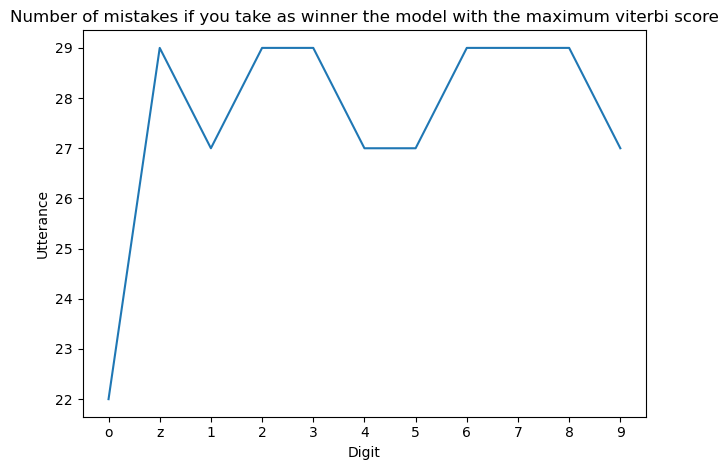

In [5]:
# Viterbi approx
"""
Compute the Viterbi log likelihood for woodHMMs['o'] and example['lmfcc'] and verify that you obtain the same result as in example['vloglik'].

Plot the alpha array that you obtained in the forward section and overlay the best path obtaine by the Viterbi decoding. Can you explain the reason why the path looks this way?

Using the Viterbi algorithm, score all the 44 utterances in the data with each of hte 11 HMM models in the wordHMMs. How many mistakes can you count if you take as winner the model with teh maximum viterbi score? 
"""
example = np.load("lab2_example.npz", allow_pickle=True)["example"].item()

# Viterbi log likelihood for wordHMMs['o'] and example['lmfcc']
lmfcc = example["lmfcc"]
obsloglik = log_multivariate_normal_density_diag(
    X=lmfcc, means=wordHMMs_one["o"]["means"], covars=wordHMMs_one["o"]["covars"]
)
viterbi_loglik, path = viterbi(
    obsloglik,
    np.log(wordHMMs_one["o"]["startprob"]),
    np.log(wordHMMs_one["o"]["transmat"][:-1, :-1]),
)
print("Viterbi log likelihood for wordHMMs['o'] and example['lmfcc']: ", viterbi_loglik)
print("Example['vloglik']: ", example["vloglik"])
print("Are they the same? ", np.array_equal(np.round(viterbi_loglik, 1), np.round(example["vloglik"], 1)))

# Plot the alpha array obtained in the forward section and overlay the best path obtained by the Viterbi decoding
plt.figure()
plt.imshow(log_alpha.T, aspect="auto", origin="lower", interpolation="none")
plt.title("Alpha array obtained in the forward section, digit 'o'")
plt.xlabel("Time")
plt.ylabel("State")
plt.colorbar()
plt.plot(path, color="red")
plt.tight_layout()
plt.show()

# Viterbi algorithm, score all the 44 utterances in the data with each of the 11 HMM models in the wordHMMs
viterbi_scores = {}
example = np.load("lab2_data.npz", allow_pickle=True)["data"]

for digit in prondict.keys():
    viterbi_scores[digit] = []
    for i in range(len(example)):
        lmfcc = example[i]["lmfcc"]
        obsloglik = log_multivariate_normal_density_diag(
            X=lmfcc, means=wordHMMs_one[digit]["means"], covars=wordHMMs_one[digit]["covars"]
        )
        viterbi_loglik, path = viterbi(
            obsloglik,
            np.log(wordHMMs_one[digit]["startprob"]),
            np.log(wordHMMs_one[digit]["transmat"][:-1, :-1]),
        )
        viterbi_scores[digit].append(viterbi_loglik)
print("\n")
print("Viterbi scores: ", viterbi_scores)
print("\n")

# Count the number of mistakes if you take as winner the model with the maximum viterbi score
viterbi_scores_max = {}
for digit in prondict.keys():
    viterbi_scores_max[digit] = np.argmax(viterbi_scores[digit])
print("\n")
print("Viterbi scores max: ", viterbi_scores_max)
print("\n")

# Plot the number of mistakes if you take as winner the model with the maximum viterbi score
plt.figure()
plt.plot(list(viterbi_scores_max.keys()), list(viterbi_scores_max.values()))
plt.title("Number of mistakes if you take as winner the model with the maximum viterbi score")
plt.xlabel("Digit")
plt.ylabel("Utterance")
plt.tight_layout()
plt.show()

In [24]:
np.seterr(divide="ignore")  # Suppress divide by zero warning
example = np.load("lab2_example.npz", allow_pickle=True)["example"].item()
phone_hmms = np.load("lab2_models_all.npz", allow_pickle=True)["phoneHMMs"].item()

# Assuming prondict is defined elsewhere and used here
word_hmms = {}
for digit in prondict.keys():
    word_hmms[digit] = concatHMMs(phone_hmms, ["sil"] + prondict[digit] + ["sil"])

data = np.load("lab2_data.npz", allow_pickle=True)["data"]

best_loglik = None
best_model = None

varianceFloor = 5.0

for digit in wordHMMs_all.keys():
    print("Testing model: ", digit)
    means = wordHMMs_all[digit]["means"]
    covars = wordHMMs_all[digit]["covars"]
    # Getting the log likelihood of the data
    obsloglik = log_multivariate_normal_density_diag(
        data[10]["lmfcc"], means, covars
    )
    vloglik = 0
    # Initial viterbi log likelihood
    newloglik = viterbi(
        obsloglik,
        np.log(wordHMMs_all[digit]["startprob"]),
        np.log(wordHMMs_all[digit]["transmat"][:-1, :-1]),
    )[0]
    iteration = 0
    while iteration < 20 and abs(newloglik - vloglik) > 1.0:
        # Update value of log-likelihood
        vloglik = newloglik
        # Getting the forward and backward probabilities
        forward_prob = forward(
            obsloglik,
            np.log(wordHMMs_all[digit]["startprob"]),
            np.log(wordHMMs_all[digit]["transmat"]),
        )
        backward_prob = backward(
            obsloglik,
            np.log(wordHMMs_all[digit]["startprob"]),
            np.log(wordHMMs_all[digit]["transmat"]),
        )
        log_gamma = statePosteriors(forward_prob, backward_prob)
        # Updated our means and covars then grab the new log likelihood of data
        means, covars = updateMeanAndVar(data[10]["lmfcc"], log_gamma)
        obsloglik = log_multivariate_normal_density_diag(
            data[10]["lmfcc"], means, covars
        )
        newloglik = viterbi(
            obsloglik,
            np.log(wordHMMs_all[digit]["startprob"]),
            np.log(wordHMMs_all[digit]["transmat"][:-1, :-1]),
        )[0]
        iteration += 1
    print(
        "Log-likelihood: "
        + str(newloglik)
        + ". Number of iterations needed "
        + str(iteration)
    )

    if best_loglik is None or newloglik > best_loglik:
        best_loglik = newloglik
        best_model = digit
print(
    "The best log-likelihood is: "
    + str(best_loglik)
    + ". It corresponds to the model "
    + str(best_model)
)


Testing model:  o
Log-likelihood: -6318.836143374645. Number of iterations needed 5
Testing model:  z
Log-likelihood: -5833.2706240493735. Number of iterations needed 5
Testing model:  1
Log-likelihood: -5903.338261970018. Number of iterations needed 10
Testing model:  2
Log-likelihood: -6190.713363055121. Number of iterations needed 5
Testing model:  3
Log-likelihood: -6012.101687040116. Number of iterations needed 4
Testing model:  4
Log-likelihood: -5994.050816900843. Number of iterations needed 5
Testing model:  5
Log-likelihood: -5963.922425732666. Number of iterations needed 5
Testing model:  6
Log-likelihood: -5884.528943767897. Number of iterations needed 5
Testing model:  7
Log-likelihood: -5682.161964496241. Number of iterations needed 5
Testing model:  8
Log-likelihood: -6185.97163186002. Number of iterations needed 4
Testing model:  9
Log-likelihood: -5953.968391594907. Number of iterations needed 5
The best log-likelihood is: -5682.161964496241. It corresponds to the model